밤 11시에 사람들이 가장 많이 타는 역은 어디일까

승차 패턴 찾기<br> 
승차 시각이 1시간씩 늦어질 때 마다 인덱스 2씩 늘어남 <br> 승차 시작 시간의 인덱스 값 4 -> 4시부터 승차가 시작(첫차)<br> 
승차 시각(t) 와 승차 인원이 적힌 인덱스(i) 관계 분석 <br>
i = 4 + (t -4) * 2


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ''


t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))
# t는 4 이상 why? 새벽 4시부터 데이터가 있다 

for row in data:
  row[4:] = map(int,row[4:])
  a = row[ 4 + (t-4) * 2] #입력 받은 시각의 승차 인원 값 추출

  if a > mx:
    mx = a
    mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

몇 시의 승차인원이 가장 많은 역이 궁금하세요? : 4
구로(경부선) 8418


시간대별 최대 승차 역 이름 및 승차 인원 막대 그래프로 표현하기

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for j in range(24):
    a = row[j * 2 + 4] # 시간대별 패턴 i = j * 2 + 4 (j는 0 ~ 23까지) -> 시작 인덱스 4
    if a > mx[j]:
      mx[j] = a
      mx_station[j] = row[3]

#print(mx_station)

plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.bar(range(24),mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

역 이름과 시간 추가로 넣기

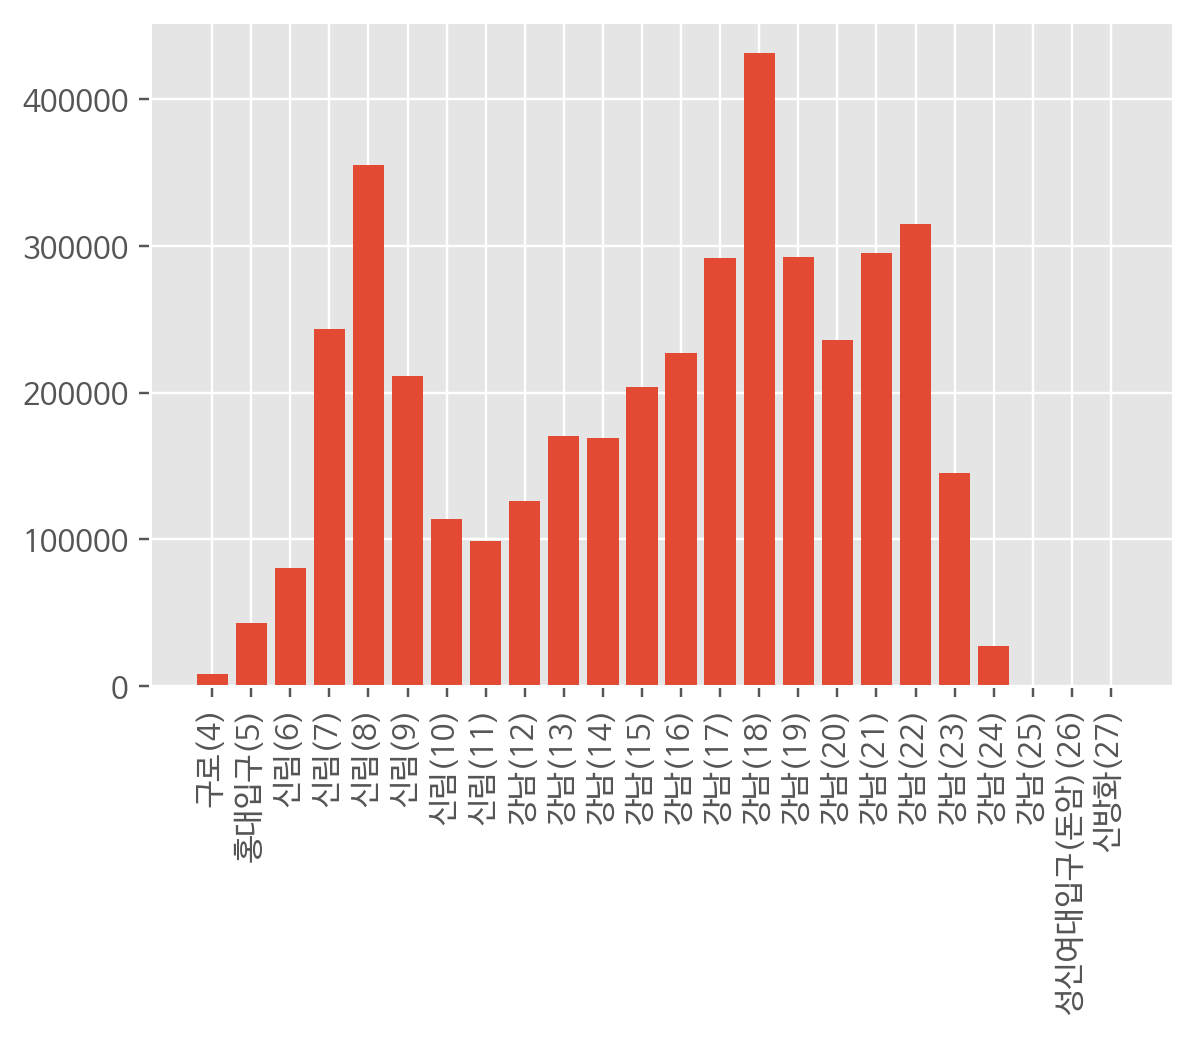

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for j in range(24):
    a = row[j * 2 + 4]
    if a > mx[j]:
      mx[j] = a
      mx_station[j] = row[3] + '(' + str(j+4) + ')' # 역과 이름 추가로 넣기

plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.bar(range(24),mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

시단대별로 하차 인원이 가장 많은 역 막대 그래프로 표현하기

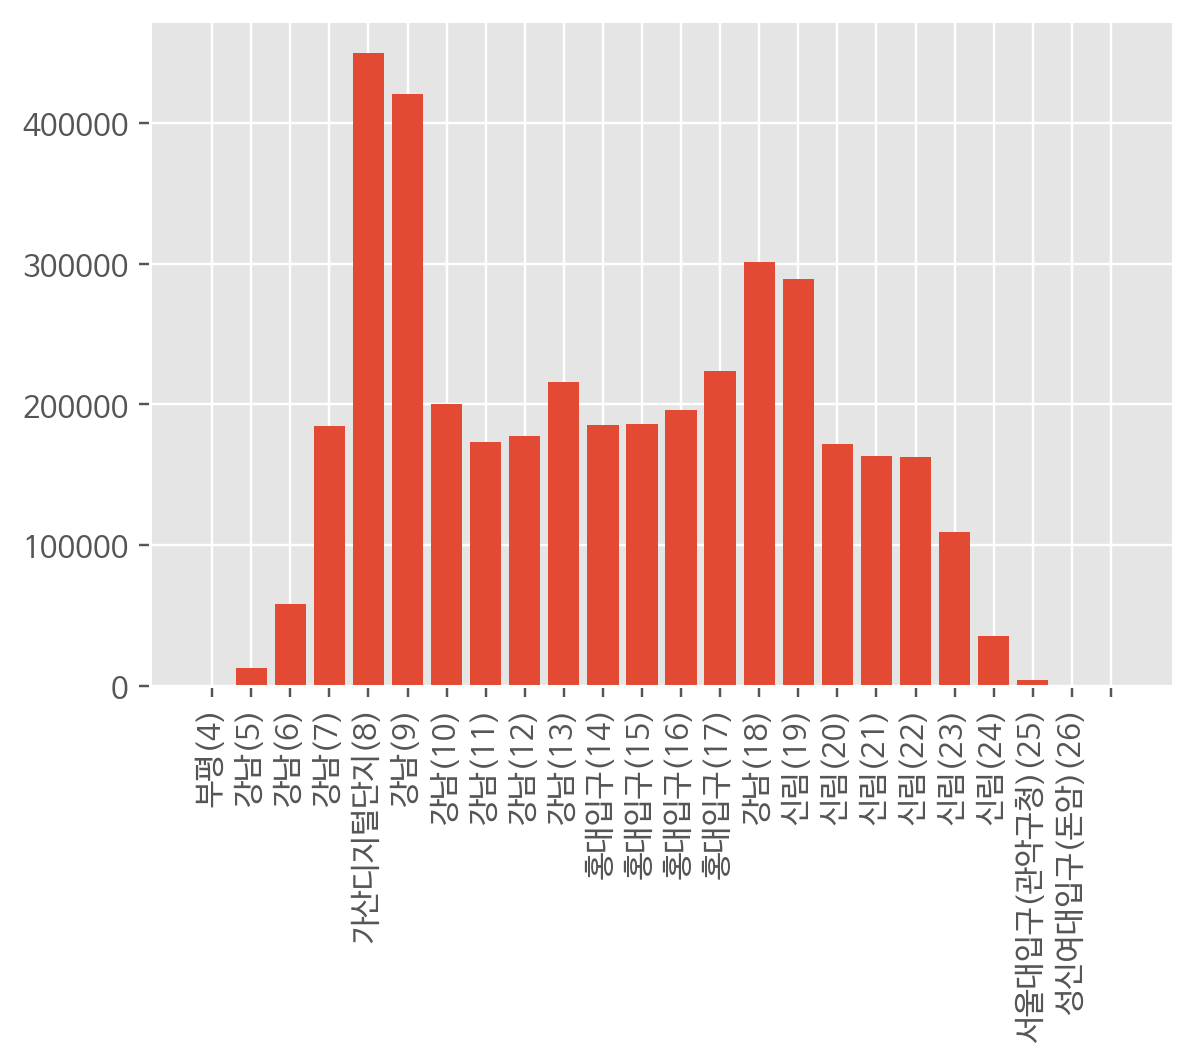

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for j in range(24):
    a = row[ 5 + (j * 2) ]
    if a > mx[j]:
      mx[j] = a
      mx_station[j] = row[3] + '(' + str(j+4) + ')' # 역과 이름 추가로 넣기

plt.style.use('ggplot')
plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.bar(range(24),mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

모든 지하철역에서 시간대별 승하차 인원을 모두 더하기

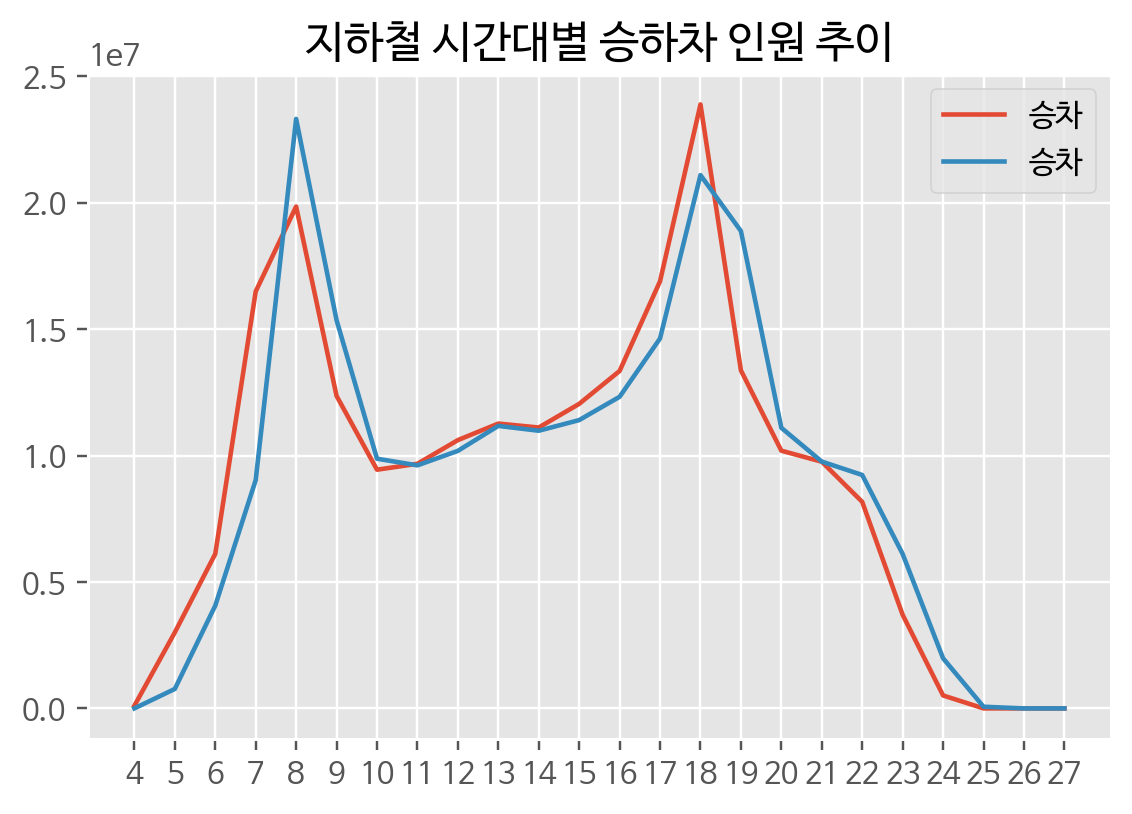

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')

data = csv.reader(f)
next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data:
  row[4:] = map(int,row[4:])
  for i in range(24):
    s_in[i] += row[4 + i * 2] # 승차
    s_out[i] += row[5 + i * 2] # 하차

plt.rc('font',family='NanumBarunGothic')
plt.figure(dpi = 110)
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='승차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()   